In [2]:
import math
import numpy as np
from matplotlib import pyplot as plt

# 第2章 単変量の確率モデル

## 2.1 はじめに

### 2.1.1 確率とは？
確率には2つの解釈がある。

- **頻度主義 (frequentism)** 的解釈  
  複数回発生し得る**事象 (event)** を想定し、確率はその試行回数を増やした際の事象の頻度を表しているという解釈  
  例) コインを何度も投げれば2回に1回は表が出る
- **ベイズ (Baysian)** 的解釈  
  事象の**不確実性 (uncertanity)** を測るものであり、本質的に情報と関係しているとする解釈  
  例) コインを投げたら 50% の確率で表が出る (と信じている)

どちらの解釈においても確率の公式などに違いはないが、ベイズ的な解釈では、一度限りしか起こり得ない事象など頻度を定義できない事象に関する不確実性をモデル化できる。

### 2.1.2 不確実性の種類
予測に不確実性が生じる原因は2つある。

- **認識的不確実性 (epistemic uncertanity)** または **モデル不確実性 (model uncertanity)**
  データが発生する根底にある隠れた原因や仕組みを知らないために生じる不確実性
- **偶発的不確実性 (aleatoric uncertanity)** または **データ不確実性 (data uncertanity)**
  対象自体のばらつきに起因する、データを増やしても減ることのない不確実性

エントロピーを用いる能動学習のように、不確実性を区別することが重要になる場合がある。

### 2.1.3 論理の拡張としての確率
確率をブール論理 (Boolean logic) の拡張として捉えた場合の基本的な公式を紹介する。

#### 2.1.3.1 事象の確率
「成り立つ」か「成り立たない」か、どちらか一方となる状態を **事象 (event)** と呼び、二値変数 $A$ で表す。  
事象 $A$ が真であると信じる確率を $Pr(A)$ と表し、$0 \leq Pr(A) \leq 1$ である。  
事象 $A$ が発生しない事象は $\bar{A}$ と表され、その確率は $Pr(\bar{A}) = 1 - Pr(A)$ である。  

#### 2.1.3.2 2つの事象の積の確率
事象 $A$ と事象 $B$ が同時に起こる確率を**同時確率 (joint probability)** と呼び、以下のように表す。

$$
Pr(A \land B) = Pr(A, B)
$$

事象 $A$ と事象 $B$ が独立であれば、次が成り立つ。

$$
Pr(A, B) = Pr(A)Pr(B)
$$

#### 2.1.3.3 2つの事象の和の確率
事象 $A$ と事象 $B$ の少なくともどちらか一方が発生する確率は、以下の式で表される。

$$
Pr(A \lor B) = Pr(A) + Pr(B) - Pr(A, B)
$$

また、事象 $A$ と事象 $B$ が排反 (同時に発生しない) の場合には、以下の式が成り立つ。

$$
Pr(A \lor B) = Pr(A) + Pr(B)
$$

#### 2.1.3.4 ある事象が与えられた下での他の事象の条件付き確率
事象 $A$ が発生した下で事象 $B$ が発生する確率を**条件付き確率(conditional probability)** と呼び、次のように定義する。

$$
Pr(B|A) \triangleq \frac{Pr(A, B)}{Pr(A)}
$$

#### 2.1.3.5 事象の独立性
事象 $A$ と事象 $B$ について以下が成り立つ場合、事象 $A$ と事象 $B$ は **独立 (independent)** であるという。

$$
Pr(A, B) = Pr(A)Pr(B)
$$

#### 2.1.3.6 事象の条件付き独立性
事象 $A$ と事象 $B$ について以下が成り立つ場合、事象 $A$ と事象 $B$ は事象 $C$ が与えられた下での**条件付き独立 (conditionally independent)** であるという。

$$
Pr(A, B|C) = Pr(A|C)Pr(B|C)
$$

事象は互いに独立ではない (従属である) ことが多いが、中間変数で条件付けすることで独立にできることがあり、この時 $A \bot B | C$ と表す。

## 2.2 確率変数
ある量 $X$ が未知であったり、変化し得る時、$X$ を**確率変数 (random variable, RV)** と呼ぶ。
また、$X$ が取り得る値の集合 $\mathcal{X}$  を**標本空間 (sample space)** または**状態空間 (state space)** と呼ぶ。
数学的に、事象とは標本空間に含まれる結果の集合である。

### 2.2.1 離散確率変数
標本空間 $\mathcal{X}$ が有限、または可算無限個の場合、$X$ を**離散確率変数 (discrete random variable)** と呼ぶ。
この時、$X$ が $x$ という値を取る事象の確率を $Pr(X=x)$ と表し、取り得る値それぞれに対して、その事象が発生する確率を与える関数として、**確率質量関数 (probability mass function, PMF)** を以下のように定義する。

$$
p(x) \triangleq Pr(X=x)
$$

確率質量関数は下記を満たす。

$$
0 \leq p(x) \leq 1, \sum_{x \in \mathcal X} p(x) = 1
$$

$X$ が有限個の値しか取らない場合には、確率質量関数は有限調のリストとして表現可能でヒストグラムで表すことができる。
また、確率変数がある特定の値しか取らない場合には、指示関数 $\mathbb{I}$ を用いて、$p(x)=\mathbb{I}(x=1)$ のように表す。

### 2.2.2 連続確率変数
$X$ が実数値 $\mathbb{R}$ を取る場合には、**連続確率変数 (continurous random variable)** と呼ばれる。

#### 2.2.2.1 累積分布関数 (CDF)
事象 $A, B, C$ を $A=(X \leq a), B=(X \leq b), C=(a < X \leq b)$ とする。
この時、事象 $A$ と $C$ は排反であり、$B=A \lor C$ が成り立つため、以下の式が成り立つ。

$$
Pr(B) = Pr(A) + Pr(C)
$$

よって、確率変数 $X$ が区間 $C$ に含まれる確率は以下のように計算できる。

$$
Pr(C) = Pr(B) - Pr(A)
$$

一般に確率変数 $X$ の**累積分布関数 (cumulative distribution function, CDF)** を次のように定義する。

$$
P(x) \triangleq Pr(X \leq x)
$$

この表記を用いて、任意の区間に $X$ が含まれる確率は以下のように表される。

$$
Pr(a < X \leq b) = P(b) - P(a)
$$

累積分布関数は単調非減少関数である。

#### 2.2.2.2 確率密度関数
累積分布関数の微分を **確率密度関数 (probability density function, PDF)** と定義する。(未定義となる場合もある。)

$$
p(x) \triangleq \frac{d}{dx}P(x)
$$

確率密度関数を用いた場合、連続変数がある有界区間に含まれる確率は以下のように計算できる。

$$
Pr(a < X \leq b) = \int_a^b p(x) dx = P(b) - P(a)
$$

区間の幅を十分に小さく $dx$ とした場合には、この確率を以下のように近似できる。

$$
Pr(x < X \leq x + dx) \approx p(x)dx 
$$

#### 2.2.2.3 分位点
累積分布関数 $P$ が狭義単調増加である時、$P$ は逆関数 $P^{-1}$ を持ち、これを **逆累積分布関数 (inverse cumulative distribution function)** または **パーセント点関数 (percent point function, PPF)**、**分位関数 (quantile function)** と呼ぶ。  
$Pr(X \leq x_q) = q$ である時、$P^{-1}(q) = x_q$ であり、このような $x_q$ を $P$ の $q$ 分位点と呼ぶ。
特に $P^{-1}(0.25), P^{-1}(0.5), P^{-1}(0.75)$ を、それぞれ **第1四分位点 (lower quartile)**、**中央値 (median)**、**第3四分位点 (upper quartile)** と呼ぶ。

### 2.2.3 互いに関連のある確率変数の集合
2つの確率変数 $X, Y$ を考えた時、$X$ と $Y$ が取り得る全ての値について $p(x, y) = p(X = x, Y= y)$ と定める。
これを2つの確率変数に対する**同時分布 (joint distribution)** を定義できる。
同時分布が与えられたもとで、一方の**周辺分布 (marginal distribution)** を次のように定義する。

$$
p(X = x) = \sum_y p(X = x, Y= y)
$$

これは、**和の法則 (sum rule)** や**全確率の公式 (rule of total probability)** とも呼ばれる。  
また、確率変数の**条件付き確率分布 (conditional distribution)** を次のように定義する。

$$
p(Y = y|X = x) = \frac{p(X=x, Y=y)}{p(X = x)}
$$

これを整理して**積の法則 (product rule)** を得る。

$$
p(x, y) = p(x)p(y|x)
$$

積の法則を $D$ 個の確率変数に拡張すると、**確率の連鎖率 (chain rule of probability)** が得られる。

$$
p(x_{1:D}) = p(x_1)p(x_2|x_1)p(x_3|x_2,x_1)p(p_4|x_3,x_2,x_1) \cdots p(x_D|x_{1:D-1})
$$

### 2.2.4 独立と条件付き独立
$X$ と $Y$ の同時分布が各周辺分布の積で表せる時、これらの確率変数は**条件なし独立 (unconditionally independent)** または**周辺独立 (marginally independent)** であると言い、$X \bot Y$ と書く。

$$
X \bot Y \Leftrightarrow p(X, Y) = p(X)p(Y)
$$

より一般に、$n$ 個の確率変数 $X_1, \cdots, X_n$ について、全ての部分集合 ${X_1, \cdots, X_m} \subseteq {X_1, \cdots, X_n}$ について、その同時分布が周辺分布の積で表せるとき、これらの確率変数は**独立 (independent)** であるという。

$$
p(X_1, \cdots, X_m) = \prod_{i = 1}^m p(X_i) 
$$

上記のように全ての確率変数が条件なし独立であることは稀である。
しかし、ある確率変数を経由して、2つの確率変数が間接的に影響しあっている場合がある。
この時、条件付き同時分布 $p(X, Y | Z)$ が条件付き周辺分布の積 $p(X|Z)p(Y|Z)$ である時、$Z$ が与えられた下で $X$ と $Y$ が**条件付き独立 (conditionally independent)** であるという。

$$
X \bot Y | Z \Leftrightarrow p(X, Y | Z) = p(X | Z)p(Y | Z)
$$

このような確率変数の関係をグラフを用いて表現したものを**グラフィカルモデル (graphical model)** と呼ぶ。(詳細後述)

### 2.2.5 分布のモーメント
#### 2.2.5.1 分布の平均
連続確率変数の**平均 (mean)** または**期待値 (expected value)**：

$$
\mathbb{E}[X] \triangleq \int_{\mathbb{X}} xp(x) dx
$$

離散確率変数の**平均 (mean)**：

$$
\mathbb{E}[X] \triangleq \sum_{x \in \mathbb{X}} xp(x)
$$

これらの値は、$\mu$ と表記されることもある。  
**期待値の線形性 (linearity of expectation)**：

$$
\mathbb{E}[aX + b] = a\mathbb{E}[X] + b
$$

$n$ 個の確率変数の和の期待値：

$$
\mathbb{E} \Bigg[\sum_{i = 1}^n X_i\Bigg] = \sum_{i = 1}^n \mathbb{E}[X_i]
$$

$n$ 個の確率変数が互いに独立である場合の積の期待値：

$$
\mathbb{E} \Bigg[\prod_{i = 1}^n X_i\Bigg] = \prod_{i = 1}^n \mathbb{E}[X_i]
$$

#### 2.2.5.2 分布の分散
**分散 (variance)** は確率分布の広がり度合いを定量化したもので、$\sigma^2$ で表す。

$$
\begin{align}
\mathbb{V}[X] &\triangleq \mathbb{E}[(X-\mu)^2] = \int (x - \mu)^2 p(x) dx \\
              &= \int x^2 p(x) dx + \mu^2 \int p(x) dx - 2 \mu \int xp(x) dx = \mathbb{E}[X^2] - \mu^2
\end{align}
$$

よって、以下の式が成り立つ。

$$
\mathbb{E}[X^2] = \sigma^2 + \mu^2
$$

分散の平方根 $\sigma$ を**標準偏差 (standard deviation)** と呼び、確率変数と同じ単位を持つ。

$$
std[X] \triangleq \sqrt{\mathbb{V}[X]} = \sigma
$$

確率変数のスケール変換や平行移動を行った場合には、以下のような式が成り立つ。

$$
\mathbb{V}[aX + b] = a^2 \mathbb{V}[X]
$$

$n$ 個の独立な確率変数の和の分散は、各確率変数の分散の和で表される。

$$
\mathbb{V} \Bigg[\sum_{i=1}^n X_i \Bigg] = \sum_{i=1}^n \mathbb{V}[X_i]
$$

また、積の分散は以下の式で与えられる。

$$
\begin{align}
\mathbb{V} \Bigg[\prod_{i=1}^n X_i \Bigg] &= \mathbb{E} \Bigg[ \Bigg( \prod_{i=1}^n X_i \Bigg)^2 \Bigg] - \Bigg( \mathbb{E} \Bigg[ \prod_{i=1}^n X_i \Bigg] \Bigg)^2 \\
&= \mathbb{E} \Bigg[ \prod_{i=1}^n X_i^2 \Bigg] - \Bigg( \prod_{i=1}^n \mathbb{E} [X_i] \Bigg)^2 \\
&= \prod_{i=1}^n \mathbb{E} [X_i^2] - \prod_{i=1}^n (\mathbb{E} [X_i])^2 \\
&= \prod_{i=1}^n (\sigma_i^2 + \mu_i^2) - \prod_{i=1}^n \mu_i^2 \\
\end{align}
$$

#### 2.2.5.3 分布の最頻値
確率質量関数、または確率密度関数が最大値を取る時の確率変数の値を、その確率分布の**最頻値 (mode)** と呼ぶ。

$$
x^* = argmax\ p(x)
$$

#### 2.2.5.4 条件付きモーメント
2つ以上の充足する確率変数がある時、片方の確率変数の知識が与えられた下で、もう片方の確率変数モーメントを計算できる。  
**繰り返し期待値の法則 (low of iterated expectations)** または**全期待値の法則 (low of total expectations)**：

$$
\begin{align}
\mathbb{E}_Y[\mathbb{E}[X|Y]] &= \mathbb{E}_Y \Bigg[\sum_x xp(X=x|Y) \Bigg] \\
&= \sum_y \Bigg[\sum_x xp(X=x|Y=y) \Bigg] p(Y=y) \\
&= \sum_{x,y} xp(X=x, Y=y) \\
&= \mathbb{E}[X]
\end{align}
$$

**全分散の法則 (low of total variance)** または**条件付き分散の公式 (conditional variance formula)**：

$$
\begin{align}
\mathbb{V}[X] &= \mathbb{E}[X^2] - (\mathbb{E}[X])^2 = \mathbb{E}_Y \big[\mathbb{E}[X^2|Y] \big] - \big(\mathbb{E}_Y [\mathbb{E}[X|Y] \big)^2 \\
&= \mathbb{E}_Y \Big[\mathbb{V}[X|Y] + \big( \mathbb{E}[X|Y] \big)^2 \Big] - \big(\mathbb{E}_Y [\mathbb{E}[X|Y] \big)^2 \\
&= \mathbb{E}_Y \big[\mathbb{V}[X|Y] \big] + \mathbb{E}_Y \big[ \mathbb{E}[X|Y] \big]^2 - \big(\mathbb{E}_Y [\mathbb{E}[X|Y] \big)^2 \\
&= \mathbb{E}_Y \big[\mathbb{V}[X|Y] \big] + \mathbb{V}_Y \big[\mathbb{E}[X|Y] \big]
\end{align}
$$

### 2.2.6 要約統計量の限界
ここまで、平均や分散などの統計量を用いて、確率分布を要約する手法を見てきた。
しかし、これらの要約によって多くの情報が失われる可能性がある点に注意する必要がある。

## 2.3 ベイズの定理
**ベイズ推論 (Bayesian inference)** (または**事後推論 (posterior inference)**、**確率的推論 (probabilistic inference)**) は「確実さの度合い」を確率論を用いて表現し、かつデータが与えられるたびに**ベイズの定理 (Bayes' rule)** を用いてそれを更新する推論手法を指す。  
ベイズの定理は、観測量 $Y = y$ が与えられた時、未知量 (**隠れ変数 (hidden variable)**) $H$ の取り得る値に関する確率分布を計算する公式である。

$$
p(H = h | Y = y) = \frac{p(H = h)p(Y = y | H = h)}{p(Y = y)}
$$

これは、**確率の積の法則 (product rule of probability)** から導出できる。

$$
p(h|y)p(y) = p(h)p(y|h) = p(h, y)
$$

- **事前分布 (prior distribution)**：$p(H)$  
  データを観測する前の $H$ が取り得る値に関する知識を表す
- **観測分布 (observation distribution)**：$p(Y|H=h)$  
  隠れ変数 $H$ が値 $h$ を取る場合の $Y$ の取り得る値についての確率分布を表す
- **尤度 (likelihood)**：$p(Y=y|H=h)$  
  実際の観測 $y$ について観測分布を評価した値。$H$ の取り得る全ての値について和をとっても1にならないので確率分布ではない。
- **周辺尤度 (marginal likelihood)**：$p(Y=y)$  
  未知量 $H$ について周辺化したもので、隠れ変数 $H$ によらない定数数である。
  $p(Y=y) = \sum_{h' \in \mathbb{H}} p(H=h')p(Y=y|H=h') = \sum_{h' \in \mathbb{H}} p(H=h', Y=y)$
- **事後分布 (posterior distribution)**：$p(H=h|Y=y)$
  $H$ の取り得る値の新しい**信念状態 (belief state)** を表す。

### 2.3.1 例：COVID-19 の検査
(略)

### 2.3.2 例：モンティーホール問題
(略)

### 2.3.3 逆問題
確率論は、世界の状態に関する知識や仮定 $h$ が与えられた下で、結果 $y$ に関する確率分布を予測する問題を取り扱う。
一方、**逆確率 (inverse probability)** は、観測結果をもとに世界の状態を推論する問題を取り扱う。
つまり、$h \rightarrow y$ という写像を逆向きにしていると考えることができる。  
**視覚シーン理解 (visual scene understanding)** や**自然言語理解 (natural laguage understanding)** のようなタスクでは、観測 $y$ に対して矛盾のない隠れ状態 $h$ は複数存在するため、本質的には**不良設定 (ill-posed)** である。  
しかし、このような**逆問題 (inverse problem)** に対してベイズの定理を使うと、**順モデル (forwards model)** $p(y|h)$ と事前分布 $p(h)$ を定めることで、事後分布 $p(h|y)$ を計算できる。

## 2.4 ベルヌーイ分布と二項分布
### 2.4.1 定義
コインを投げて表が出る事象を $Y=1$、裏が出る事象を $Y=0$ とし、表が出る確率を $\theta$ とする。
この時、$p(Y=1) = \theta$、$p(Y=0) = 1 - \theta$ が成り立つことを仮定すると、この確率分布は**ベルヌーイ分布 (Nernoulli distribution)** $Ber$ と呼ばれる。

$$
Y \sim Ber(\theta)
$$

上記の $\sim$ は「左の確率変数が右の確率分布から抽出される (に従う)」という意味で、ベルヌーイ分布の確率質量関数は以下の式で表される。

$$
Ber(y|\theta) = \begin{cases}
    1 - \theta & (y=0) \\
    \theta & (y=1)
  \end{cases}
$$

あるいは、以下のように表現することも可能である。

$$
Ber(y|\theta) \triangleq \theta^y (1 - \theta)^{1-y}
$$

ベルヌーイ分布は**二項分布 (binomial distribution)** $Bin$ の特殊例である。
ベルヌーイ分布に従う事象を $N$ 回観測することを考えた時、 $n$ 回目の試行で得られる観測結果を $y_n$ とすると $y_n \sim Ber(\cdot|\theta)$ と表せる。
表の出た回数を $s$ とすると、$s \triangleq \sum_{n=1}^N \mathbb{I}(y_n=1)$ が成り立つ。
また、$N$ 個の中から $k$ 個を選択する場合の数を表す**二項係数 (binomial coefficient) を以下のように定義する。

$$
\begin{pmatrix}
   N \\
   k
\end{pmatrix}
\triangleq \frac{N!}{(N-k)!k!}
$$

この時、二項分布 $Bin(s|N, \theta)$ は以下の式で定義される。

$$
Bin(s|N, \theta) \triangleq \begin{pmatrix}
   N \\
   k
\end{pmatrix} \theta^s (1 - \theta)^{N-s}
$$


In [4]:
# 二項分布の計算を行う関数
def binomial_disribution(n, theta=0.5):
    binomials = []
    for s in range(n + 1):
        binomial_coefficient = math.factorial(n) / math.factorial(n - s) / math.factorial(s)
        binomial = binomial_coefficient * math.pow(theta, s) * math.pow(1 - theta, n - s)
        binomials.append(binomial)
    return binomials

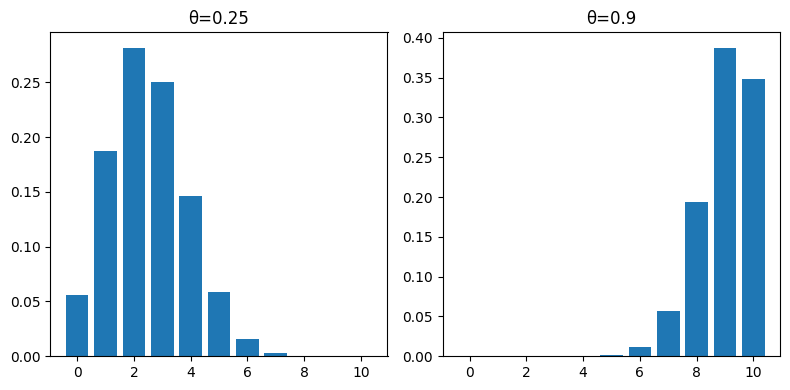

In [28]:
N = 10

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axes[0].set_title("θ=0.25")
axes[0].bar([n for n in range(N + 1)], binomial_disribution(N, 0.25))
axes[1].set_title("θ=0.9")
axes[1].bar([n for n in range(N + 1)], binomial_disribution(N, 0.9))
fig.tight_layout()
plt.show()

### 2.4.2 シグモイド関数 (ロジスティック関数)
入力 $\boldsymbol{x} \in \mathbb{X}$ が与えられた時に二値変数 $y \in \{0, 1\}$ を予測したい場合、以下の形式の**条件付き確率分布 (conditional probability distribution, CPD)** を用いる。

$$
p(y | \boldsymbol{x}, \boldsymbol{\theta}) = Ber \big(y | f(\boldsymbol{x}; \boldsymbol{\theta}) \big)
$$

ここで、$f(\boldsymbol{x}; \boldsymbol{\theta})$ は出力分布の平均パラメータを予測する関数である。
この平均パラメータが制約 $0 \leq f(\boldsymbol{x}; \boldsymbol{\theta}) \leq 1$ を課すことを避けるために、値域に制約のない関数であることを許容し、次のようなモデルを使う場合がある。

$$
p(y | \boldsymbol{x}, \boldsymbol{\theta}) = Ber \Big(y | \sigma \big(f(\boldsymbol{x}; \boldsymbol{\theta}) \big) \Big)
$$

ここで $\sigma$ は**シグモイド (sigmoid)** または**ロジスティック (logistic)** 関数と呼ばれ、以下の式で定義される。

$$
\sigma (a) \triangleq \frac{1}{1 + e^{-a}}
$$

シグモイド関数は**ヘビサイドの階段関数 (Heaviside step function)** を滑らかにした関数と解釈することも可能である。

$$
H(a) \triangleq \mathbb{I}(a > 0)
$$

シグモイド関数を用いた条件付き確率分布の式に、$a = f(\boldsymbol{x}; \boldsymbol{\theta})$ としてシグモイド関数の定義式を代入すると、以下の式が得られる。

$$
\begin{align}
p(y = 1 | \boldsymbol{x}, \boldsymbol{\theta}) &= \frac{1}{1 + e^{-a}} = \sigma (a) \\
p(y = 0 | \boldsymbol{x}, \boldsymbol{\theta}) &= 1 - \frac{1}{1 + e^{-a}} = \frac{e^{-a}}{1 + e^{-a}} = \frac{1}{1 + e^a} =  \sigma (-a)
\end{align}
$$

また、$p=p(y = 1 | \boldsymbol{x}, \boldsymbol{\theta})$ とした場合に、$\log ( \frac{p}{1-p} )$ を**対数オッズ比 (log odds)** と呼ぶ。
$a = f(\boldsymbol{x}; \boldsymbol{\theta})$ とした時、$a$ は対数オッズ比と等しくなる。

$$
\log \Bigg( \frac{p}{1-p} \Bigg) = \log \Bigg( \frac{e^a}{1 + e^a} \frac{1 + e^a}{1} \Bigg) = \log (e^a) = a
$$

ロジスティック関数、またはシグモイド関数は、対数オッズ比 $a$ を $p$ に変換する。

$$
p = logistic(a) = \sigma (a) \triangleq \frac{1}{1 + e^{-a}} = \frac{e^a}{1 + e^a}
$$

また、この逆関数を**ロジット (logit)** 関数と呼び、$p$ を対数オッズ比 $a$ に変換する。

$$
a = logit(p) = \sigma^{-1} (p) \triangleq \log \Big( \frac{p}{1 - p} \Big)
$$

In [34]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

def heaviside(a):
    return np.where(a > 0, 1, 0)

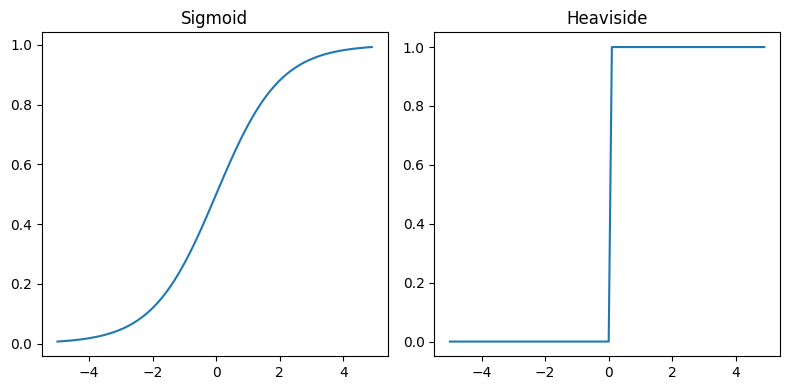

In [36]:
x = np.arange(-5, 5, 0.1)
y_sigmoid = sigmoid(x)
y_heaviside = heaviside(x)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axes[0].set_title("Sigmoid")
axes[0].plot(x, y_sigmoid)
axes[1].set_title("Heaviside")
axes[1].plot(x, y_heaviside)
fig.tight_layout()
plt.show()

### 2.4.3 二値ロジスティック回帰
ここでは、$f(\boldsymbol{x}; \boldsymbol{\theta}) = \boldsymbol{w}^\top \boldsymbol{x} + b$ という線形予測器を適用したモデルを用いた場合を考える。
この時モデルは以下の式で与えられる。

$$
p(y = 1 | \boldsymbol{x}; \boldsymbol{\theta}) = Ber \big(y = 1 | \sigma (\boldsymbol{w}^\top \boldsymbol{x} + b) \big) = \sigma (\boldsymbol{w}^\top \boldsymbol{x} + b) = \frac{1}{1 + e^{-(\boldsymbol{w}^\top \boldsymbol{x} + b)}}
$$

このモデルは**ロジスティック回帰 (logistic regression)** と呼ばれる。
詳細は第10章で扱う。

## 2.5 カテゴリカル分布と多項分布
有限個のラベル集合 $y \in \{1, \cdots, C \}$ 上の確率分布として、ベルヌーイ分布を $C > 2$ の場合に一般化した**カテゴリカル分布 (categorical distribution)** がよく用いられる。

### 2.5.1 定義
カテゴリカル分布 $Cat(y|\boldsymbol{\theta})$ は離散分布であり、各クラスにつき1つのパラメータを持つ。

$$
Cat(y | \boldsymbol{\theta}) \triangleq \prod_{c=1}^C \theta_c^{\mathbb{I}(y=c)}
$$

つまり、$p(y = c | \boldsymbol{\theta}) = \theta_c$ である。
また、パラメータには $0 \leq \theta \leq 1, \sum_{c=1}^C \theta_c = 1$ という制約より、独立したパラメータは $C - 1$ 個である。  
離散変数 $y$ を**ワンホットベクトル (one-hot vector)** 化して、$C$ 次元の**単位ベクトル (unit vector)** $\{ \boldsymbol{e}_c \}_{c=1}^C$ で表現すると、以下のように書くこともできる。

$$
Cat(\boldsymbol{y} | \boldsymbol{\theta}) \triangleq \prod_{c=1}^C \theta_c^{y_c}
$$

ただし、$\boldsymbol{e}_c$ は $c$ 番目の要素が 1 で、それ以外が 0 のベクトルである。  
カテゴリカル分布に従う観測が $N$ 回得られた時、これを $y_n \sim Cat(\cdot|\boldsymbol{\theta}) (n=1:N)$ と書くこととする。
それぞれのクラスが観測された回数を記録したベクトルをワンホットベクトルを用いて $\boldsymbol{s} = \sum_n \boldsymbol{y}_n$とし、$s_c \triangleq \sum_{n=1}^N \mathbb{I} (y_n = c)$ とする。
この時、$\boldsymbol{s}$ は下記の**多項分布 (multinomial distribution)** で与えられる。

$$
\mathcal{M}(\boldsymbol{s} | N, \boldsymbol{\theta}) \triangleq \begin{pmatrix}
   N \\
   s_1 \cdots s_C
\end{pmatrix} \prod_{c=1}^C \theta_c^{s_c}
$$

ここで、$\theta_c$ はクラス $c$ が観測される確率である。
また、**多項係数 (multinomial coefficient)** は、大きさ $N = \sum_{n=1}^N s_c$ の集合を、大きさが $s_1$ から $s_C$ の $C$ 個の部分集合に分割する場合の数であり、以下の式で与えられる。

$$
\begin{pmatrix}
   N \\
   s_1 \cdots s_C
\end{pmatrix} \triangleq \frac{N!}{s_1!s_2! \cdots s_C!}
$$

N=1 の時の多項分布はカテゴリカル分布と一致する。

### 2.5.2 ソフトマックス関数
有限個のラベル上の分布となる条件付きモデルを考えた場合、以下の条件付きモデルを用いるのが自然である。

$$
\begin{align}
p(y | \boldsymbol{x}, \boldsymbol{\theta}) &= Cat \big(y | f(\boldsymbol{x}; \boldsymbol{\theta}) \big) \\
p(y | \boldsymbol{x}, \boldsymbol{\theta}) &= \mathcal{M} \big(y | 1, f(\boldsymbol{x}; \boldsymbol{\theta}) \big)
\end{align}
$$

ただし、関数 $f$ は制約 $0 \leq f_c(\boldsymbol{x}; \boldsymbol{\theta}) \leq 1$、$\sum_{c=1}^C f_c(\boldsymbol{x}; \boldsymbol{\theta}) = 1$ を満たす。  
$f$ が確率を直接出力するという制約を課さないようにするため、出力に**ソフトマックス (softmax)** 関数 (あるいは**多項ロジット (multinomial logit)** 関数) $\mathcal{S}(a)$ を適用することが多い。

$$
\mathcal{S}(\boldsymbol{a}) \triangleq \Bigg[ \frac{e^{a_1}}{\sum_{c'=1}^C e^{a_{c'}}}, \cdots, \frac{e^{a_C}}{\sum_{c'=1}^C e^{a_{c'}}} \Bigg]
$$

ソフトマックス関数は $\mathbb{R}^C$ から $[0, 1]^C$ への写像であり、$0 \leq \mathcal{S}(\boldsymbol{a})_c \leq 1$ と $\sum_{c=1}^C \mathcal{S}(\boldsymbol{a})_c = 1$ を満たす。
ソフトマックス関数への入力 $\boldsymbol{a} = f(\boldsymbol{x}; \boldsymbol{\theta})$ は、対数おっっずを一般化した**ロジット (logit)** と呼ばれる。  
ロジットの各要素 $a_c$ を**温度 (temperature)** と呼ばれる定数 $T$ で割ることを考える。
この時、$T \rightarrow 0$ とすると、次の式が成り立つ。

$$
\mathcal{S}(\boldsymbol{a} / T)_c = \begin{cases}
    1 & (c=argmax_{c'}\ a_{c'}) \\
    0 & (otherwise)
  \end{cases}
$$

つまり、温度が低い場合には確率質量のほとんどが最も起こりやすい状態に集中する。(**勝者総取り (winner takes all)**)
一方で、温度が高い時には確率質量が一様に広がる。
すなわち、ソフトマックス関数は $argmax$ 関数と似た振る舞いをすると言える。

In [37]:
def softmax(a, T=1):
    return np.exp(a / T) / np.sum(np.exp(a / T))

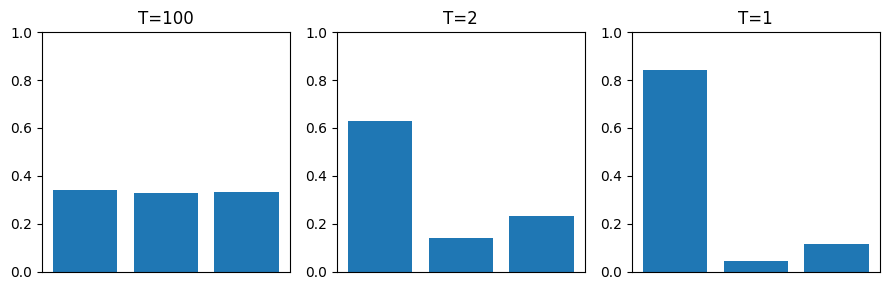

In [53]:
# a = (3, 0, 1) としたときの、温度パラメータによるソフトマックス関数の出力の比較
x = np.array([3, 0, 1])
y_100 = softmax(x, T=100)
y_2 = softmax(x, T=2)
y_1 = softmax(x, T=1)

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(9, 3))
axes[0].set_title("T=100")
axes[0].bar([i for i in range(len(x))], y_100)
axes[0].tick_params(labelbottom=False, labelleft=True, labelright=False, labeltop=False)
axes[0].tick_params(bottom=False, left=True, right=False, top=False)
axes[1].set_title("T=2")
axes[1].bar([i for i in range(len(x))], y_2)
axes[1].tick_params(labelbottom=False, labelleft=True, labelright=False, labeltop=False)
axes[1].tick_params(bottom=False, left=True, right=False, top=False)
axes[2].set_title("T=1")
axes[2].bar([i for i in range(len(x))], y_1)
axes[2].tick_params(labelbottom=False, labelleft=True, labelright=False, labeltop=False)
axes[2].tick_params(bottom=False, left=True, right=False, top=False)
fig.tight_layout()
plt.ylim(0, 1)
plt.show()

### 2.5.3 多クラスロジスティック回帰
$\boldsymbol{W}$ を $C\times D$ 行列、$\boldsymbol{b}$ を $C$ 次元のバイアスベクトルとして、$f(\boldsymbol{x}; \boldsymbol{\theta}) = \boldsymbol{W}\boldsymbol{x} + \boldsymbol{b}$ という形の線形予測器を用いると、条件付きモデルは次式で与えられる。

$$
p(y|\boldsymbol{x}; \boldsymbol{\theta}) = Cat \big( y | \mathcal{S} (\boldsymbol{W}\boldsymbol{x} + \boldsymbol{b}) \big)
$$

ここで、$\boldsymbol{a} = \boldsymbol{W}\boldsymbol{x} + \boldsymbol{b}$ とすれば、$\boldsymbol{a}$ はロジットを表す $C$ 次元のベクトルである。
この時、常識は以下のように書き換えることができる。

$$
p(y = c|\boldsymbol{x}; \boldsymbol{\theta}) = \frac{e^{a_c}}{\sum_{c'=1}^C e^{a_{c'}}}
$$

これを、**多項ロジスティック回帰 (multinomial logistic regression)** と呼ぶ。
2クラスの場合には、下記の式変形より二値のロジスティック回帰と一致する。

$$
\mathcal{S} (\boldsymbol{a})_0 = \frac{e^{a_0}}{e^{a_0} + e^{a_1}} = \frac{1}{1 + e^{- (a_0 - a_1)}} = \sigma (a_0 - a_1)
$$

二値のロジスティック回帰ではあるロジット $\boldsymbol{a}$ を予測するモデルがあれば十分であり、これは1つの重みベクトルで実現できる。
しかし、上式のように多クラスの定式化を用いると $\boldsymbol{w}_0, \boldsymbol{w}_1$ の2つの重みベクトルが必要となる。
このようなモデルを**過剰パラメータ (over-parameterized)** と呼ばれ、予測結果は変わらないにもかかわらず解釈性が悪くなる。

### 2.5.4 log-sum-exp トリック
ソフトマックス関数の分母は**分配関数 (partition function)** $Z(\boldsymbol{a}) = \sum_{c'=1}^C e^{a_{c'}}$ と呼ぶ。
ロジット $\boldsymbol{a}$ の各要素値の絶対値が大きい場合には、オーバーフローによって指数演算が正しく計算できない場合がある。
これを回避するため、以下の式変形を利用する。

$$
\log \sum_{c=1}^C \exp(a_c) = m + \log \sum_{c=1}^C \exp(a_c - m)
$$

この式は、任意の $m$ について成り立つが、通常ロジットの最大値を用いる。
このような計算上の工夫を **log-sum-exp トリック (log-sum-exp trick)** と呼ばれる。
数値計算では以下の **lse 関数** を実装する際にこのトリックが用いられる。

$$
lse(\boldsymbol{a}) \triangleq \log \sum_{c=1}^C \exp(a_c)
$$

$lse$ 関数を用いるとロジットから確率を次のように計算できる。

$$
p(y=c | \boldsymbol{x}) = exp(a_c - lse(\boldsymbol{a}))
$$

これを第5章で述べる交差エントロピー損失に代入してモデルにデータを当てはめる。
しかし、通常、交差エントロピーの入力にはロジットを用いる。
二値の場合の交差エントロピー損失 $\mathcal{L}$ は、以下の式で与えられる。

$$
\mathcal{L} = - \big[ \mathbb{I}(y = 0) \log p_0 + \mathbb{I}(y = 1) \log p_1]
$$

その場合、以下のように書き換えることができる。

$$
\begin{align}
\log p_1 &= \log \frac{1}{1 + e^{-a}} = \log (1) - \log (1 + e^{-a}) = 0 - lse ([0, -a]) \\
\log p_0 &= 0 - lse ([0, +a])
\end{align}
$$

## 2.6 単変量ガウス分布
ガウス分布は**正規分布 (normal distribution)** とも呼ばれる、実確率変数 $y \in \mathbb{R}$ の分布である。

### 2.6.1 累積分布関数
連続確率変数 $Y$ の**累積分布関数 (cumulative distribution function, CDF)** を次のように定義する。

$$
P(y) \triangleq Pr(Y \leq y)
$$

累積分布関数を用いると、ある区間 $(a, b]$ に確率変数が存在する確率を以下のように表せる。

$$
P(a < Y \leq b) =P(b) - P(a)
$$

累積分布関数は単調非減少である。
ガウス分布の累積分布関数は以下のように定義される。

$$
\Phi (y; \mu, \sigma^2) \triangleq \int_{-\infty}^y \mathcal{N} (z | \mu, \sigma^2) dz
$$

あるいは、$z = (y - \mu) / \sigma$ とし、**誤差関数 (error function)** $erf(u)$ を用いて以下のように書かれることもある。

$$
\begin{align}
erf(u) &\triangleq \frac{2}{\sqrt{\pi}} \int_0^u e^{-t^2} dt \\
\Phi (y; \mu, \sigma^2) &= \frac{1}{2} \Bigg( 1 + erf \Big( \frac{z}{\sqrt{2}} \Big) \Bigg)
\end{align}
$$

パラメータ $\mu$ は分布の平均であり、ガウス分布の場合は最頻値となる。
また、パラメータ $\sigma^2$ は分布の分散であり、その代わりに分散の逆数である**精度 (precision)** $\lambda = 1 / sigma^2$ を用いる場合もある。
$\mu = 0, \sigma = 1$ のガウス分布を**標準正規分布 (standard normal distribution)**、正規分布の累積分布関数の逆関数 $\Phi^{-1}$ を**プロビット関数 (probit function)** と呼ぶ。

### 2.6.2 確率密度関数
**確率密度関数 (probability density function, PDF)** は、累積分布関数の導関数として定義される。

$$
p(y) \triangleq \frac{d}{dy} P(y)
$$

ガウス分布の確率密度関数は、以下のような式となる。

$$
\mathcal{N} (y | \mu, \sigma^2) \triangleq \frac{1}{\sqrt{2 \pi \sigma^2}} e^{- \frac{1}{2 \sigma^2} (y - \mu)^2}
$$

確率密度関数が与えられた場合には、連続変数がある有界区間に含まれる確率 $Pr(a < Y \leq b)$ は以下の式で与えられる。

$$
Pr(a < Y \leq b) = \int_a^b p(y) dy = P(b) - P(a)
$$

さらに、この区間が十分小さければ以下のように近似することもできる。

$$
Pr(y < Y \leq y + dy) \approx p(y)dt
$$

ある値における確率密度関数は1より大きくなる可能性がある点に注意する。  
確率密度関数を用いると、分布の平均 (または期待値) は次のように表される。

$$
\mathbb{E}[Y] \triangleq \int_{\mathcal{Y}} yp(y)dy
$$

ガウス分布では $\mathbb{E}[\mathcal{N} (\cdot | \mu, \sigma^2)] = \mu$ となる。
しかし、この値が有限にならない分布も存在し、その場合には平均は定義できない。  
一方、分散は次の式で定義される。

$$
\begin{align}
\mathbb{V}[Y] \triangleq \mathbb{E}[(Y - \mu)^2] &= \int_{\mathcal{Y}} (y - \mu)^2 p(y) dy \\
&= \int y^2 p(y) dy + \mu^2 \int p(y) dy - 2 \mu \int yp(y) dy \\
&= \mathbb{E} [Y^2] - \mu^2
\end{align}
$$

よって、次のような性質が得られる。

$$
\mathbb{E} [Y^2] = \sigma^2 + \mu^2
$$

また標準偏差 $\sigma$ は次のように定義される。

$$
std[Y] \triangleq \sqrt{\mathbb{V}[Y]} = \sigma
$$

特に、ガウス分布では $std{V}[\mathcal{N} (\cdot | \mu, \sigma^2)] = \sigma$ が成り立つ。

### 2.6.3 回帰
ここまでは条件付けされていないガウス分布を扱ってきたが、入力 $x$ の関数になっているようなガウス分布を扱う場合もある。

$$
p(y | \boldsymbol{x}; \boldsymbol{\theta}) = \mathcal{N} \big( y | f_\mu (\boldsymbol{x}; \boldsymbol{\theta}), f_\sigma (\boldsymbol{x}; \boldsymbol{\theta})^2 \big)
$$

ここで、$f_\mu (\boldsymbol{x}; \boldsymbol{\theta}) \in \mathbb{R}$ は平均の推定、$f_\sigma (\boldsymbol{x}; \boldsymbol{\theta}) \in \mathbb{R}_{+}$ は分散の推定である。  
分散が固定で入力に依存しないと仮定したモデルを**等分散回帰 (homoscedastic regression)** モデルと呼ばれる。
さらに、平均が入力の線形関数であるという仮定を置いたモデルは**線形回帰 (linear regression)** と呼ばれ、次のように定式化される。

$$
p(y | \boldsymbol{x}; \boldsymbol{\theta}) = \mathcal{N} \big( y | \boldsymbol{w}^{\top}\boldsymbol{x} + b, \sigma^2 \big)
$$

この時、パラメータ $\boldsymbol{\theta} = (\boldsymbol{w}, b, \sigma^2)$ である。  
一方、分散が入力に依存したと仮定しtモデルは**不均一分散回帰 (heteroskedastic regression)** モデルと呼ばれる。
特に入力に対して平均、分散が共に線形関数である場合には、以下のように定式化できる。

$$
p(y | \boldsymbol{x}; \boldsymbol{\theta}) = \mathcal{N} \big( y | \boldsymbol{w}_{\mu}^{\top}\boldsymbol{x} + b, \sigma_{+}(\boldsymbol{w}_{\sigma}^{\top}\boldsymbol{x}) \big)
$$

パラメータとして $\boldsymbol{\theta} = (\boldsymbol{w}_{\mu}, \boldsymbol{w}_{\sigma})$ の2つの回帰重みを持つ。
また、$\sigma_{+} : \mathbb{R} \rightarrow \mathbb{R}_{+}$ は値が皮膚であることを保証する**ソフトプラス (softplus)** 関数である。

$$
\sigma_{+} (a) = \log (1 + e^a)
$$

### 2.6.4 なぜガウス分布は広く用いられるのか？
ガウス分布が機械学習でよく用いられるのには、次のような理由がある。

- パラメータが確率分布の最も基本的な量である平均と分散に対応しているため解釈性が高い
- **中心極限定理 (central limit theorem)** により、独立した確率変数の和がおおよそガウス分布に従うことが知られており、推定の残差やノイズをガウス分布でモデル化することに合理性がある
- 少数の仮定から自然に導かれる
- 単純な数式で表現可能で実装が簡単である

### 2.6.5 極限としてのディラックのデルタ関数
ガウス分布の分散を0に近づけると、スパイク形状の分布となる。

$$
\lim_{\sigma \rightarrow 0} \rightarrow \delta (y - \mu)
$$

この $\delta$ は**ディラックのデルタ関数 (Dirac delta function)** であり、以下のように定義される。

$$
\delta (x) = \begin{cases}
+ \infty & (x = 0) \\
0 & (x \neq 0)
\end{cases}
$$

また、ディラックのデルタ関数は、以下のように正規化される。

$$
\int_{- \infty}^{\infty} \delta (x) dx = 1
$$

以下のような関数も定義できる。

$$
\delta_y (x) = \delta (x - y) = \begin{cases}
+ \infty & (x = y) \\
0 & (x \neq y)
\end{cases}
$$

デルタ関数には次のような**より分けの性質 (sifting property)** がある。

$$
\int_{- \infty}^{\infty} f(y)\delta (x - y) dx = f(x)
$$

## 2.7 その他の頻出する単変量分布

### 2.7.1 スチューデントの t 分布
ガウス分布は**外れ値 (outlier)** に対して敏感であるため、より頑健な分布として**スチューデントの t 分布 (Student t distribution)** (あるいはスチューデント分布) が用いられることがある。
スチューデント分布の確率密度関数は以下のようになる。

$$
\mathcal{T}(y | \mu, \sigma^2, \nu) \propto \Bigg[ 1 + \frac{1}{\nu} \Big( \frac{y - \mu}{\sigma} \Big)^2 \Bigg]^{- \frac{\nu + 1}{2}}
$$

$\mu$ は平均、$\sigma > 0$ はスケールパラメータ、$\nu > 0$ は**自由度 (degrees of freedom)** または**正規度 (degrees of normality)** である。
自由度 $\nu$ が大きくなるにつれてガウス分布に近づく。  
スチューデント分布の確率密度関数は、中心からの二乗距離に対して多項式的に減少するため、指数的に減少するガウス分布に比べて、分布の裾により多くの確率質量が存在する (**裾が重い (heavy tails)**))。
この性質によって、外れ値に対する頑健性を獲得している。  
スチューデント分布の平均は $\nu > 1$、分散は $\nu > 2$ の場合のみ定義可能で、その時の平均と最頻値は $\mu$、分散は $\frac{\nu\sigma^2}{\nu - 2}$ となる。
また、$\nu \gg 5$ の場合には急激にガウス分布に近づくため、自由度は $\nu = 4$ がよく用いられる。

### 2.7.2 コーシー分布
$\nu = 1$ の場合のスチューデントの t 分布は、**コーシー分布 (Cauchy distribution)**、または**ローテレンツ分布 (Lorentz distribution)** と呼ばれ、確率密度関数は以下で与えられる。

$$
\mathcal{C}(x | \mu, \gamma) = \frac{1}{\pi\gamma} \Bigg[ 1 + \Big( \frac{x - \mu}{\gamma} \Big)^2 \Bigg]^{-1}
$$

この分布は裾が重く平均が収束しないという性質を持つ。  
コーシー分布のうち、$\mu = 0$ で確率密度関数が正の値を取る領域以外を打ち切った分布を**半コーシー分布 (half Cauchy distribution)** と呼ぶ。

$$
\mathcal{C}_{+}(x | \mu, \gamma) \triangleq \frac{2}{\pi\gamma} \Bigg[ 1 + \Big( \frac{x}{\gamma} \Big)^2 \Bigg]^{-1}
$$

この分布は正の区間の裾が重い分布に従うデータをベイズ的にモデル化する場合に有用である。

### 2.7.3 ラプラス分布
**ラプラス分布 (Laplace distribution)**、または**両側指数分布 (double sided exponential)** は、次のような確率密度関数を持つ裾の重い分布である。

$$
Lap(y | \mu, b) \triangleq \frac{1}{2b} \exp \Big( - \frac{|y - \mu|}{b} \Big)
$$

$\mu$ は位置パラメータ、$b > 0$ はスケールパラメータと呼ばれる。
また、平均と最頻値は $\mu$、分散は $2 b^2$ である。

### 2.7.4 ベータ分布
**ベータ分布 (beta distribution)** は、$[0, 1]$ の区間に台を持つ確率分布で、ベータ関数とガンマ関数を用いて次のように定義される。

$$
\begin{align}
Beta(x | a, b) &= \frac{1}{B(a, b)} x^{a - 1} (1 - x)^{b - 1} \\
B(a, b) & \triangleq \frac{\Gamma (a) \Gamma (b)}{\Gamma (a + b)} \\
\Gamma (a) & \triangleq \int_0^{\infty} x^{a - 1} e^{-x} dx
\end{align}
$$

ベータ分布は $a, b > 0$ の時に可積分である。
また、$a = b = 1$ の時にベータ分布は一様分布となり、共に1未満の場合は0と1にピークのある二峰、共に1より大きい場合に単峰の分布となる。
その平均は $\frac{a}{a + b}$、最頻値は $\frac{a - 1}{a + b - 2}$、分散は $\frac{ab}{(a + b)^2 (a + b + 1)}$ である。

### 2.7.5 ガンマ分布
**ガンマ分布 (gamma distribution)** は、正の実数値をとる確率分布で、形状パラメータ $a > 0$、レートパラメータ $b > 0$ を持つ。

$$
Ga(x | a, b) \triangleq \frac{b^a}{\Gamma (a)} x^{a - 1} e^{-xb}
$$

あるいは、スケールパラメータ $s = 1/b$ を用いて次のように書くこともできる。

$$
Ga(x | a, s) \triangleq \frac{1}{s^a \Gamma (a)} x^{a - 1} e^{-x/s}
$$

ガンマ分布の平均は $\frac{a}{b}$、最頻値は $max(\frac{a-1}{b}, 0)$、分散は $\frac{a}{b^2}$ となる。  
また、ガンマ分布の特殊例として以下のような確率分布が定義される。

- 指数分布 (exponential distribution): 単位時間あたりの平均イベント発生数が $\lambda$ であるようなポアソン過程において、イベントの発生間隔が従う分布
$$
Expon(x | \lambda) \triangleq Ga(x | a = 1, b = \lambda)
$$

- カイ二乗分布 (chi-squared distribution): $\nu$ を自由度として、ガウス分布に従う $\nu$ 個の確率変数の二乗和の分布に対応する分布
$$
\chi^2_{\nu} \triangleq Ga \Big( x | a = \frac{\nu}{2}, b = \frac{1}{2} \Big)
$$
  
- 逆ガンマ分布 (inverse gamma distribution)
$$
IG(x | a, s = b) \triangleq \frac{b^a}{\Gamma (a)} x^{-(a + 1)} e^{-b/x}
$$

逆ガンマ分布の平均は $\frac{b}{a-1}$、最頻値は $\frac{b}{a+1}$、分散は $\frac{b^2}{(a-1)^2(a-2)}$ である。
平均は $a > 1$、分散は $a > 2$ の時にのみ定義される。
もし、$X \sim Ga(a, b)$ ならば、$1/X \sim IG(a, b)$ であるが、前者の $b＄はレートパラメータだが、後者はスケールパラメータである。

### 2.7.6 経験分布
$N$ 個のサンプル $\mathcal{D} = \{ x^{(1)}, x^{(2)}, \cdots, x^{(N)} \}$ が、実区間に値を取る確率分布 $p(X)$ に従って生成されたものとする。
この確率密度関数は、ディラックのデルタ関数の集合として近似することができる。

$$
\hat{p}_N (x) = \frac{1}{N} \sum_{n = 1}^N \delta_{x^{(i)}} (x)
$$

これを、データセット $\mathcal{D}$ の**経験分布 (empirical distribution)** と呼ぶ。
対応する累積分布関数は以下のように与えられる。

$$
\hat{P}_N (x) = \frac{1}{N} \sum_{n = 1}^N \mathbb{I} \big( x^{(i)} \leq x \big) = \frac{1}{N} \sum_{n = 1}^N u_{x^{(i)}} (x)
$$

ここで、$u_y (x)$ は**ステップ関数 (step function)** である。

$$
u_y (x) = \begin{cases} 
1 & (x \geq y) \\
0 & (x < y)
\end{cases}
$$

## 2.8 確率変数の変換
確率変数 $\boldsymbol{x} \sim p$ について、決定的な変換 $\boldsymbol{y} = f(\boldsymbol{x})$ を行った場合の $p(\boldsymbol{x})$ の計算方法を考える。

### 2.8.1 離散確率変数の場合
$X$ が離散確率変数の場合、$Y$ の確率質量関数 $p_y (Y)$ は以下の式で与えられる。
これは、$f(x) = y$ となる $x$ における確率質量を足し合わせた値である。

$$
p_y(y) = \sum_{x : f(x) = y} p_x(x)
$$

### 2.8.2 連続確率変数の場合
$X$ が連続確率変数の場合、累積分布関数について以下の式が成り立つ。

$$
P_y(y) \triangleq Pr(Y \leq y) = Pr(f(X) \leq y) = Pr \big( X \in \{ x | f(x) \leq y \} \big)
$$

### 2.8.3 可逆変換 (全単射写像) の場合
変数変換が可逆である、すなわち変換が**全単射 (bijector)** である場合を考える。

#### 2.8.3.1 変数変換：スカラー値の場合
任意の $p_x (x)$ と単調な関数 $f : \mathbb{R} \rightarrow \mathbb{R}$ を考える。
$f$ の逆関数を $g = f^{-1}$ とすると、$y = f(x)$ の時、$x = g(y)$ である。
$f$ が狭義単調増加であれば、以下の式が成り立つ。

$$
P_y(y) = Pr(f(X) \leq y) = Pr ( X \leq  f^{-1} (y) ) = P_x(f^{-1}(y)) = P_x (g(y))
$$

これを微分すると以下の結果が得られる。

$$
p_y(y) \triangleq \frac{d}{dy} P_y(y) = \frac{d}{dy} P_x(g(y)) = \frac{dx}{dy} \frac{d}{dx} P_x(g(y)) = \frac{dx}{dy} p_x(g(y))
$$

狭義単調減少の場合にも符号が逆の同様の式が得られるため、絶対値を取って以下のような式が得られる。

$$
p_y(y) = p_x(g(y)) \Bigg| \frac{d}{dy}g(y) \Bigg|
$$

#### 2.8.3.2 変数変換：スカラー値の場合
上述の結果を多変量分布に拡張する。
$\boldsymbol{f}$ を $\mathbb{R}^n \rightarrow \mathbb{R}^n$ の可逆な関数とし、その逆関数を $\boldsymbol{g}$ とする。
$\boldsymbol{y} = \boldsymbol{f} (\boldsymbol{x})$ の確率密度関数は以下のようになる。

$$
p_y(\boldsymbol{y}) = p_x(\boldsymbol{g} (\boldsymbol{y})) \big| det[\boldsymbol{J}_g (\boldsymbol{y})] \big|
$$

ここで、$\boldsymbol{J}_g = \frac{d \boldsymbol{g}(\boldsymbol{y})}{d \boldsymbol{y}^{\top}}$ はヤコビ行列、$\big| det[\boldsymbol{J} (\boldsymbol{y})] \big|$ は行列式の絶対値である。

### 2.8.4 線形変換のモーメント
$f$ がアフィン関数 $\boldsymbol{y} = \boldsymbol{A}\boldsymbol{x} + \boldsymbol{b}$ である時、$\boldsymbol{y}$ の平均と共分散は、$\boldsymbol{\mu} = \mathbb{E}[\boldsymbol{x}]$ と $\boldsymbol{\Sigma} = Cov[\boldsymbol{x}]$ を用いて次のように表される。

$$
\begin{align}
\mathbb{E}[\boldsymbol{y}] &= \boldsymbol{A}\boldsymbol{\mu} + \boldsymbol{b} \\
Cov[\boldsymbol{y}] &= \boldsymbol{A}\boldsymbol{\Sigma}\boldsymbol{A}^{\top}
\end{align}
$$

スカラー値関数 $y = f(x) = \boldsymbol{a}^{\top}\boldsymbol{x} + b$ の場合は次の通りである。

$$
\begin{align}
\mathbb{E}[y] &= \boldsymbol{a}^{\top} \boldsymbol{\mu} + b \\
\mathbb{V}[y] &= \boldsymbol{a}^{\top} \boldsymbol{\Sigma} \boldsymbol{a}
\end{align}
$$

### 2.8.5 畳み込み定理
$x_1$ と $x_2$ が独立な確率変数で、$y = x_1 + x_2$ であるとする。
$x_1$ と $x_2$ が離散確率変数の場合、$y$ の確率質量関数は、確実現値 $j = \cdots, -2, -1, 0, 1, 2, \cdots$ に対して以下のように計算できる。

$$
p(y = j) = \sum_k p(x_1 = k) p(x_2 = j - k)
$$

$x_1$ と $x_2$ が連続確率変数の場合、その確率密度関数が $p_1(x_1)$、$p_2(x_2)$　で与えられるとすると、$y$ の累積分布関数は以下で与えられる。

$$
P_y(y^*) = Pr(y \leq y^*) = \int_{-\infty}^{\infty} p_1(x_1) dx_1 \int_{-\infty}^{y^* - x_1} p_2(x_2) dx_2
$$

これは $x_1 + x_2 < y^*$ で定義される領域 $R$ 上の積分である。
この式を**ライプニッツの積分法則 (Leibnitz integral rule)** を用いて両辺微分すると、$y$ の確率密度関数が導かれる。

$$
\begin{align}
\frac{d}{dx} \int_{a(x)}^{b(x)} f(t) dt &= f \big( b(x) \big) \frac{db(x)}{dx} - f \big( a(x) \big) \frac{da(x)}{dx} \\
p(y) &= \Bigg[ \frac{d}{dy^*} P_y(y^*) \Bigg]_{y^*=y} = \int p_1 (x_1) p_2 (y-x_1) dx_1
\end{align}
$$

このような演算は**畳み込み (convolution)** と呼ばれ、次のような記号で表される。

$$
p = p_1 \circledast p_2
$$

$x_1 \sim \mathcal{N} (\boldsymbol{\mu}_1, \sigma_1^2)$、$x_2 \sim \mathcal{N} (\boldsymbol{\mu}_2, \sigma_2^2)$ の場合、各確率変数の和 $y = x_1 + x_2$ の確率密度関数は以下のように与えられる。

$$
p(y) = \mathcal{N} (x_1 | \boldsymbol{\mu}_1, \sigma_1^2) \circledast \mathcal{N} (x_2 | \boldsymbol{\mu}_2, \sigma_2^2) = \mathcal{N} (y | \boldsymbol{\mu}_1 + \boldsymbol{\mu}_2, \sigma_1^2 + \sigma_2^2)
$$

### 2.8.6 中心極限定理
$N$ 個の確率変数が共通の平均 $\mu$、分散 $\sigma^2$ を持つ場合を考える。
この時、各変数は**独立同分布 (independent and identically distribution, IID)** であると言い、各 $X_n$ は同じ分布 $p(X)$ から独立したサンプルである。
ここで、$S_N = \sum_{n=1}^N X_n$ を、それらの和を表す確率変数とすると、その分布は $N$ が大きくなるにつれて以下のような形になる。

$$
p(S_N = u) = \frac{1}{\sqrt{2 \pi N \sigma^2}} \exp \Bigg(- \frac{(u - N \mu)^2}{2 N \sigma^2} \Bigg)
$$

従って、以下の量が従う分布は標準正規分布に収束する。

$$
Z_N \triangleq \frac{S_N - N \mu}{\sigma \sqrt{N}} = \frac{\bar{X} - \mu}{\sigma / \sqrt{N}}
$$

ここで、$\bar{X} = S_N / N$ は標本平均である。
この性質を**中心極限定理 (central limit theorem)** と呼ぶ。

### 2.8.7 モンテカルロ近似
$\boldsymbol{x}$ を確率変数とし、何らかの関数 $\boldsymbol{y} = f(\boldsymbol{x})$ によって誘導された分布 $p(\boldsymbol{y})$ を解析的に計算することは困難な場合が多い。
そこで、$\boldsymbol{x}$ の分布からサンプルを抽出し、そのサンプルを使って $p(\boldsymbol{y})$ を近似する方法が考えられる。  
$p(\boldsymbol{x})$ から一様**乱数生成器 (random number generator)** を利用してサンプルを生成し、関数 $\boldsymbol{y} = f(\boldsymbol{x})$ を適用することによって、経験分布を計算して $p(\boldsymbol{y})$ を近似することができる。
この経験分布は以下の式で与えられる。

$$
p_S (y) \triangleq \frac{1}{n_S} \sum_{s = 1}^{n_S} \delta (y - y_s)
$$

このような分布の近似計算方法を**モンテカルロ近似 (Monte Carlo approximation)** と呼ぶ。

## 2.9 演習